By: 
Steven Staley ,    UID: 112443627 and 
Samirbhai Mistry,  UID: 112996604



${\underline{\textbf{UFC Data Final Project}}}$


$\textbf{Introduction:}$

Mixed Martial Arts (MMA) is a combat sport that has grown tremendously in popularity over the last 20-30 years. Characterized by a minimal ruleset that incorporates both striking and grappling, MMA allows for all inclusive competition between different styles of hand-to-hand martial arts. Traditionally, most different martial arts have competed amongst themselves within their own rulesets. For instance Tae-Kown-Do disallows kicking below the belt and punching to the face, while western boxing prevents punches below the belt and kicking all together. Grappling sports like judo and wrestling lack striking completely. However, Modern 'no-holds-barred', or 'vale tudo' (anything goes) fighting as its been known in Brazil, has evolved separately in various areas of the world with its roots in many different martial arts and traditions, some thousands of years old.  Sambo, for instance, is a Russian hand to hand martial art and Olympic sport developed in the 1920s by the Soviet Union which including throws, takedowns, submissions, and in one competition variation, full contact striking. 

Ironically, mixed martial arts played a part in the original Olympics as well in the form of Pankration, a sport that combined wrestling with striking, where the only limitations were eye gouging and biting. While today wrestling is considered only a grappling sport, at that time striking was commonplace. Even in 19th century America a wrestling style known as 'catch-as-catch-can' famously practiced by Abraham Lincoln involved striking as well as chokes and joint locks-the very same that are used in MMA today. Many associate the grappling that takes place in modern MMA with Brazilian JiuJitsu, a martial art developed in Brazil from traditional Japanese Jiujitsu/Judo and made famous through its use by the Gracie family in early paperview MMA championships as well as vale tudo fights in Brazil. However, many of the locks and other grappling moves could just as easily be traced to catch-as-catch-can or other grappling styles around the world. 

The popularity that martial arts films gained during the 70s/80s with stars like Bruce Lee and Chuck Norris brought awareness to different arts like karate or kung fu, creating interest in seeing competition between them. Early MMA fights primarily included specialists, such as Karate experts, professional boxers, and olympic medalists in Wrestling and Judo. These first fights were mainly spectacles that pitted style versus style in an effort to discover the 'best'. In the end a subset of styles persisted as the most practical. The striking arts that became popular were Muay Thai (aka Thai kickboxing), dutch kickboxing, karate, western boxing and Tae Kwon do. The grappling arts that became most effective were Brazilian JiuJitsu, Wrestling, Judo, and Sambo.

The UFC or 'Ultimate Fighting Championship', which pioneered the 'Octagon' cage-style ring that many associate with mixed martial arts, has lead to broad acceptance of MMA as a sport. However at the same time that the UFC was gaining in popularity in the US, in Japan, the Pride Fighting Championship and Pancrase Fighting Championship were also growing, just as International Vale Tudo Championship and World Vale Tudo Championship were gaining popularity in Brazil. Many of the early MMA stars such as Royce Gracie, Rickson Gracie, Bas Ruten, Ken Shamrock, and Wanderlei Silva fought in many or all of these championships. Early MMA championships had diverse rulesets, and in some cases far fewer rules than today. For instance in early UFC/Pride fights stomps to the head of a grounded opponent were legal, as well as head butts. Pancrase Fighting Championship (which derives its name from the Greek olympic sport mentioned earlier) allowed closed fist blows to the body and open palm strikes to the head but did not require any hand protection.

 
Project Description:


For this project we will be analyzing UFC fight data from 2013. The goal will be to predict the outcome of a fight based on attributes given such as "Grappling Reversals Landed" or "Guard Control Time". Due to the wide ruleset of MMA, a wide variety of fighting styles exist, and there are multiple ways to win a fight, so parsing through the data to predict exactly how a fight will end will be an intersting challenge. If a fighter is more of a grappling specialist, such as Ronda Rousey (Judo/BJJ) or Ryan Hall (strictly BJJ), a fight will be won by different attributes than if one were to look at a fight by Conor McGregor (boxing/karate) or Lyoto Machida (karate). 

One benefit of creating an algorithm to determine the outcome of a match may be as a reference for judges. There have been many decisions that have shocked and dismayed fans. Some being so bad that many have suggested a fixed fight. During instances where a judge's objectivity is called into question, having an alorithm to give analysis could possibly provide some support for a second opinion. Additionally, its been said that in MMA, due to the diverse skillsets of the competitors, it can be extremely hard to judge in the case of a decision, and judges may be affected greatly by their own skillset due to no fault of their own. Boxers will over value strikes and undervalue takedowns and submission attempts while wrestlers and Judo players may mark a fighter down for being on their backs while being on one's back would be considered a nuetral position for a brazilian jiujitsu fighter. Using an algorithm trained on past fights would lend an objective opinion that doesn't give weight to any particular fighting style, unless there is a consistent bias over a long period of fights. Another advantage would be for the purposes of betting. If a seperate algorithm could be used to simulate a fight, this could be used on that data to predict an outcome. However that is far beyond the scope of this project. 


Pankration:
https://en.wikipedia.org/wiki/Pankration

Sambo:
https://en.wikipedia.org/wiki/Sambo_(martial_art)

Brazilian JiuJitsu:
https://en.wikipedia.org/wiki/Brazilian_jiu-jitsu

Muay Thai:
https://en.wikipedia.org/wiki/Muay_Thai

Catch Wrestling:
https://en.wikipedia.org/wiki/Catch_wrestling

Pride FC: 
https://en.wikipedia.org/wiki/Pride_Fighting_Championships

UFC:
http://www.ufc.com/discover/

Rules and Regulations:
http://www.ufc.com/discover/sport/rules-and-regulations


In [688]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from IPython.display import Image 
from sklearn import tree

##Retrieving data
data = pd.read_csv("finalout.csv")

In [689]:
##displaying the data information summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 894 entries, BPrev to winner
dtypes: float64(873), int64(12), object(9)
memory usage: 10.1+ MB


In [690]:
##statistics of the data
data.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,1477.000000,1477.000000,1474.000000,1476.000000,1477.000000,1477.000000,978.000000,978.000000,978.000000,978.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,1.735274,0.654705,30.954545,177.451220,1964.633040,73.804333,0.036810,0.896728,0.431493,2.986708,...,211.965278,34.062500,66.604167,5.527778,4.319444,5.138889,12.097222,224.965278,4.562500,263.069444
std,1.895561,1.057269,4.020311,8.561541,666.949141,14.980531,0.193748,1.255722,0.830527,3.987291,...,139.412374,68.819742,94.574736,22.374419,12.854023,14.312013,36.429320,142.328509,19.698681,162.386212
min,0.000000,0.000000,20.000000,152.000000,129.000000,52.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,28.000000,172.000000,1755.000000,65.000000,0.000000,0.000000,0.000000,0.000000,...,110.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,126.750000,0.000000,139.000000
50%,1.000000,0.000000,31.000000,177.000000,2156.000000,70.000000,0.000000,0.000000,0.000000,2.000000,...,214.000000,0.000000,9.500000,0.000000,0.000000,0.000000,0.000000,232.000000,0.000000,291.000000
75%,3.000000,1.000000,34.000000,182.000000,2337.000000,84.000000,0.000000,1.000000,1.000000,4.000000,...,294.500000,47.500000,109.000000,0.000000,0.000000,0.000000,2.000000,299.000000,0.000000,300.000000
max,11.000000,7.000000,46.000000,213.000000,2882.000000,120.000000,2.000000,9.000000,6.000000,33.000000,...,647.000000,496.000000,529.000000,144.000000,91.000000,62.000000,264.000000,659.000000,128.000000,841.000000


${\textbf{Data Description:}}$


The data has information about all fights that took place in 2013, retrieved from this kaggle dataset: https://www.kaggle.com/calmdownkarm/ufcdataset. Each row represents one fight, and has columns that give information about both fighters. Half of each row is marked with 'B' for the blue corner, and half of the information is marked with 'R' for the red corner. The data is partitioned into 5 round segments. The same information is given for each round, e.g. B_Round1 takedowns landed, B_Round2 takedowns landed, B_Round1 Total Significant Strikes, B_Round2 Total Significant Strikes, etc. There are around 80 columns per round. In addition to the 5 rounds of information associated with each fighter there are columns that give information about the fighters themselves, such as height, age, and weight. 

Most columns are self explanatory (i.e. total head strikes), but due to either a lack of knowledge regarding the rules of MMA, or unclear names, some are not, so here we will give some additional information about some of the more ambiguous terms:

B/R_Prev: How Many Fights has the blue fighter recorded previously

B/RStreak: The Length of the Blue fighter's current Streak

TIP: Refers to 'Time In Position'

Clinch: Refers to the standing position where two fighters have their arms interlocked: https://en.wikipedia.org/wiki/Clinch_fighting

Guard: refers to the position on the ground where one fighter is on their back and the other is between their legs The one on top is said to be in the other person's guard. The UFC defaults control points in this position to the person on top, so 'tip_gaurd_control_Time' refers to the time the fighter was on top in this position. However, many do not consider this position to be advantageous for the top person, so this may not end up being as positive attribute for a fighter when determining a winner.

sideControl: refers to a grappling position where one fighter is laying perpendicular to the other, and on their chest/stomach https://en.wikipedia.org/wiki/Side_control. This is bad for the person on bottom, and will most likely be reflected as positive in the algorithm. 

HalfGuard: Refers to one fighter locking his legs around the other as a defensive measure to prevent the one on top from moving to side control or mount: https://en.wikipedia.org/wiki/Half_guard. Bad for the person on bottom, so 'control' refers to the fighter being on top. 

Mount: Refers to one fighter sitting on the other fighter's chest: https://en.wikipedia.org/wiki/Mount_(grappling). Very bad for the person on the bottom. While this isn't a position that puts one in danger of a submission, it is very hard to defend strikes to the head and many times ends in a knockout, or a transition to an equally bad position. Control therefore refers to the person on top. 

Back Control/back mount: Refers to the position in which one figher is behind the other with arms and legs wrapped their opponent: https://en.wikipedia.org/wiki/Back_mount. They're isn't necessarily a top or bottom position. The one in control is the one behind the other. This is extremely bad for the person not in control. 

grappling stand up: A fighter breaks away from a position on the ground and both fighters stand up. Multiple of these may show that a fighter is a superior grappler and the other is not able to take control on the ground. 

takedown: When a fighter brings both fighters to the ground. One that is able to do this at will controls the pace and positioning of the fight and is at a great advantage. 

reversal: When a fighter switches the position from not being in control, to control. Similar to a takedown, one who can make this happen at will is much more likely to win. 



${\textbf{Cleaning:}}$

As you can see, in just a quick visual scan of the data, the columns are quite verbose and there are many missing values. Some columns are duplicates and don't have much information in them. There are also quite a lot of columns. The data is divided into 5 rounds with duplicate column information for each round. Each round has over 50 columns associated with it which can be redundant. So some of this data, while pertinant information, may be a bit too granular and can be melted together. For example, 'B_Round1_strikes_ClinchHeadStrikes_Landed' and 'B_Round1_Strikes_DistanceHeadKicks_Landed' may not give us that much more information than 'total_head_strikes_landed', so we may as well just grab one column. Some columns may not yield very much information at all, such as 'B_Round1_Strikes_GroundSignificantKicks_Landed', which is almost completely zeros because very little kicking is done on the ground in mixed martial arts fights. Other columns like weight, age, and height are similarly unecessary. Each fighter is the same weight, and while height and age may have some interesting correlations in general over the data, they do not have much relevance to any specific fight. 


Therefore, we will be picking specific columns that are more promising in their liklihood of helping to predict a winner. We will also be cleaning the data a bit. For the purposes of this project, we will only use fights that were scheduled for 3 rounds. The data includes rounds 4 and 5 because championship fights are 5 rounds, while non-championship bouts are only 3, but we will not be comparing the two different lengths of fights. All fights with data in rounds 4 and 5 will be removed, or moved to their own dataset for analysis. 



Now we can remove some uneccessary columns.

In [692]:
to_remove = ['BPrev', 'RPrev', 'BStreak', 'B_Height',\
             'R_Height', 'B_HomeTown', 'R_HomeTown', 'B_ID','R_ID', \
             'B_Age','R_Age','B_Location', 'R_Location', 'B_Name', \
             'R_Name','B_Weight','R_Weight', 'Date', 'Event_ID', 'Fight_ID']

data.drop(to_remove, axis = 1, inplace=True)

In [693]:
##removing rows without data in round 1
data = data[np.isfinite(data['B__Round1_Grappling_Reversals_Landed'])]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 1 to 1476
Columns: 874 entries, B__Round1_Grappling_Reversals_Landed to winner
dtypes: float64(870), int64(2), object(2)
memory usage: 6.5+ MB


We've now cut the data down quite a bit! So we know that any values that are still NaN indicate that a round never occured due to a submission or a knockout. We can change these values to 0, which will help our learning algorithm.

In [694]:
##replacing all NaNs with 0
data.fillna(value=0,inplace=True)

Now that our dataset cleaner, it's time for us to start picking columns that we think will be good predictors for our algorithm, as well as melting some columns togther to give us better information for the whole fight. We can start to visualize the data to help give us some insight into what attributes might or might not be the best selectors. Before we start visualizing, let's create some totals columns. 

In [695]:
##First We'll start by combining some data from rounds 1-5 for totals
data['B_total_significant_strikes'] = data['B__Round1_Strikes_Significant Strikes_Landed'] + data['B__Round2_Strikes_Significant Strikes_Landed'] + data['B__Round3_Strikes_Significant Strikes_Landed'] + data['B__Round4_Strikes_Significant Strikes_Landed'] + data['B__Round5_Strikes_Significant Strikes_Landed']
data['R_total_significant_strikes'] = data['R__Round1_Strikes_Significant Strikes_Landed'] + data['R__Round2_Strikes_Significant Strikes_Landed'] + data['R__Round3_Strikes_Significant Strikes_Landed'] + data['R__Round4_Strikes_Significant Strikes_Landed'] + data['R__Round5_Strikes_Significant Strikes_Landed']
data['R_Total_Strikes_Head Significant Strikes_Landed'] = data['R__Round1_Strikes_Head Significant Strikes_Landed'] + data['R__Round2_Strikes_Head Significant Strikes_Landed'] + data['R__Round3_Strikes_Head Significant Strikes_Landed'] + data['R__Round4_Strikes_Head Significant Strikes_Landed'] + data['R__Round5_Strikes_Head Significant Strikes_Landed']
data['B_Total_Strikes_Head Significant Strikes_Landed'] = data['B__Round1_Strikes_Head Significant Strikes_Landed'] + data['B__Round2_Strikes_Head Significant Strikes_Landed'] + data['B__Round3_Strikes_Head Significant Strikes_Landed'] + data['B__Round4_Strikes_Head Significant Strikes_Landed'] + data['B__Round5_Strikes_Head Significant Strikes_Landed']
data['R_Total_Conrol_Time'] = data['R__Round1_TIP_Control Time'] + data['R__Round2_TIP_Control Time'] + data['R__Round3_TIP_Control Time'] + data['R__Round4_TIP_Control Time'] + data['R__Round5_TIP_Control Time']
data['B_Total_Conrol_Time'] = data['B__Round1_TIP_Control Time'] + data['B__Round2_TIP_Control Time'] + data['R__Round3_TIP_Control Time'] + data['B__Round4_TIP_Control Time'] + data['R__Round5_TIP_Control Time']
data['R_Total_Takedowns'] = data['R__Round1_Grappling_Takedowns_Landed'] + data['R__Round2_Grappling_Takedowns_Landed'] + data['R__Round3_Grappling_Takedowns_Landed'] + data['R__Round4_Grappling_Takedowns_Landed'] + data['R__Round5_Grappling_Takedowns_Landed']
data['B_Total_Takedowns'] = data['B__Round1_Grappling_Takedowns_Landed'] + data['B__Round2_Grappling_Takedowns_Landed'] + data['B__Round3_Grappling_Takedowns_Landed'] + data['B__Round4_Grappling_Takedowns_Landed'] + data['B__Round5_Grappling_Takedowns_Landed']


##Now we can separate the data into fights where red won and fights where blue won for later plotting
blue_winners = data[data['winner'] == 'blue']
red_winners = data[data['winner'] == 'red']


blue_tkos = blue_winners[blue_winners['winby'] == 'KO/TKO']
red_tkos = red_winners[red_winners['winby'] == 'KO/TKO']
blue_submission = blue_winners[blue_winners['winby'] == 'SUB']
red_submission = red_winners[red_winners['winby'] == 'SUB']
blue_decision = blue_winners[blue_winners['winby'] == 'DEC']
red_decision = red_winners[red_winners['winby'] == 'DEC']


We can now separate the data into championship fights (those that have data for 5 rounds) and regular fights. We seperate on the condition that a fight has data for significant strikes in round 4. This works for this data because no 5 round fights stopped before the 4th round. 

In [696]:
##Now we remove all rows with data for round 4/5 from the greater data, and moving them to a new dataset 
##We do this by checking for a value in any round 4 or round 5 column
championship_fights = data[data['R__Round4_Strikes_Total Strikes_Landed'] > 0]
data = data[data['R__Round4_Strikes_Total Strikes_Landed'] == 0]

##Next we remove all columns with Round4 and Round5 in the title
r4 = data.filter(regex='Round4', axis = 1)
r5 = data.filter(regex='Round5', axis = 1)

data.drop(list(r4.columns.values), axis = 1, inplace = True)
data.drop(list(r5.columns.values), axis = 1, inplace = True)
original_data = pd.DataFrame.copy(data)
data.info()
championship_fights.info()
original_data.drop(['B_total_significant_strikes','R_total_significant_strikes',\
                    'R_Total_Strikes_Head Significant Strikes_Landed','B_Total_Strikes_Head Significant Strikes_Landed',\
                    'R_Total_Conrol_Time', 'B_Total_Conrol_Time',\
                    'R_Total_Takedowns','B_Total_Takedowns'], axis = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 1 to 1475
Columns: 534 entries, B__Round1_Grappling_Reversals_Landed to B_Total_Takedowns
dtypes: float64(530), int64(2), object(2)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 17 to 1476
Columns: 882 entries, B__Round1_Grappling_Reversals_Landed to B_Total_Takedowns
dtypes: float64(878), int64(2), object(2)
memory usage: 924.4+ KB


As the above command shows, we've cut the data down a bit to 1411 rows and 546 columns. Now we can go about removing rows that don't have any data. These probably exist because a fight was scheduled but never happened, possibly due to a fighter missing weight or an injury. There is a slight nuance to this because NaN values in rounds 2 or 3 may actually indicate a knockout (this will become useful later on), so we need to pick a value from round1 to check. 

In [697]:
blue_decision.describe()

,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,B__Round1_Strikes_Body Significant Strikes_Landed,B__Round1_Strikes_Body Total Strikes_Attempts,B__Round1_Strikes_Body Total Strikes_Landed,B__Round1_Strikes_Clinch Body Strikes_Attempts,...,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,B_total_significant_strikes,R_total_significant_strikes,R_Total_Strikes_Head Significant Strikes_Landed,B_Total_Strikes_Head Significant Strikes_Landed,R_Total_Conrol_Time,B_Total_Conrol_Time,R_Total_Takedowns,B_Total_Takedowns
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,...,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,0.038835,0.951456,0.485437,3.271845,1.339806,11.470874,7.432039,16.626214,12.412621,2.815534,...,0.344660,30.878641,92.839806,98.228155,62.019417,61.126214,380.019417,379.364078,3.145631,3.271845
std,0.193672,1.290707,0.914534,4.340831,1.882154,11.962406,8.366760,18.082766,15.632350,4.480304,...,4.483318,99.108809,79.523205,89.819447,59.909522,55.819427,452.601811,456.751818,3.777747,4.280857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.250000,0.000000,4.000000,2.000000,6.000000,3.000000,0.000000,...,0.000000,0.000000,36.250000,30.500000,19.000000,20.250000,47.500000,99.250000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,1.000000,7.000000,5.000000,11.000000,8.000000,1.000000,...,0.000000,0.000000,72.000000,71.000000,48.000000,43.500000,200.000000,243.000000,2.000000,2.000000
75%,0.000000,1.750000,1.000000,4.000000,2.000000,16.000000,10.000000,22.000000,16.000000,3.000000,...,0.000000,0.000000,138.000000,149.000000,86.750000,86.500000,558.250000,495.750000,5.000000,4.000000
max,1.000000,7.000000,5.000000,29.000000,12.000000,73.000000,51.000000,156.000000,146.000000,25.000000,...,64.000000,532.000000,483.000000,525.000000,366.000000,357.000000,2049.000000,3777.000000,17.000000,27.000000


In [698]:
red_decision.describe()

,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,B__Round1_Strikes_Body Significant Strikes_Landed,B__Round1_Strikes_Body Total Strikes_Attempts,B__Round1_Strikes_Body Total Strikes_Landed,B__Round1_Strikes_Clinch Body Strikes_Attempts,...,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,B_total_significant_strikes,R_total_significant_strikes,R_Total_Strikes_Head Significant Strikes_Landed,B_Total_Strikes_Head Significant Strikes_Landed,R_Total_Conrol_Time,B_Total_Conrol_Time,R_Total_Takedowns,B_Total_Takedowns
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,...,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.041045,0.861940,0.380597,2.757463,0.996269,10.283582,6.723881,15.100746,11.410448,2.802239,...,0.369403,47.555970,84.052239,115.343284,74.223881,53.835821,405.690299,371.858209,3.414179,2.888060
std,0.198765,1.128274,0.732292,3.619152,1.333796,10.412908,7.115833,15.558309,13.010634,3.797554,...,6.047387,134.519455,72.714960,119.458021,79.852546,47.682265,514.979383,408.853978,4.683634,3.463367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,5.000000,3.000000,0.000000,...,0.000000,0.000000,30.750000,33.000000,17.000000,17.000000,31.500000,82.750000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,2.000000,0.500000,7.000000,5.000000,11.000000,8.000000,1.000000,...,0.000000,0.000000,61.000000,84.000000,54.000000,40.000000,260.500000,264.500000,2.000000,2.000000
75%,0.000000,1.000000,1.000000,4.000000,2.000000,13.250000,9.000000,19.000000,15.000000,4.000000,...,0.000000,0.000000,118.000000,162.000000,100.500000,74.250000,561.500000,531.250000,5.000000,4.000000
max,1.000000,6.000000,4.000000,22.000000,6.000000,68.000000,41.000000,126.000000,117.000000,31.000000,...,99.000000,598.000000,425.000000,698.000000,463.000000,231.000000,4564.000000,3941.000000,30.000000,16.000000


Now we can graph some of the totals we created in order to see if there are any noticable differences between the winners and losers on those specific attributes.

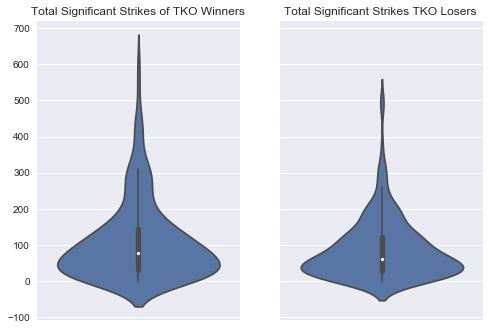

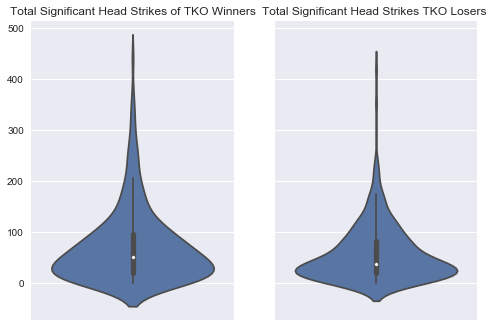

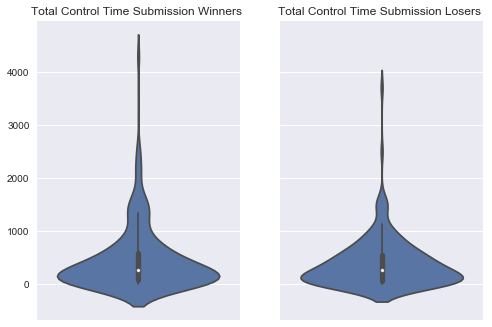

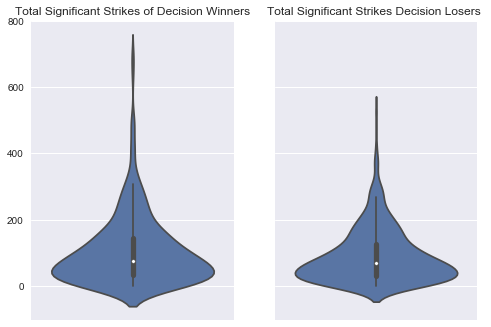

In [699]:
f, ((ax1,ax2)) = plt.subplots(1,2, sharey=True)
f, ((ax3,ax4)) = plt.subplots(1,2, sharey=True)
f, ((ax5,ax6)) = plt.subplots(1,2, sharey=True)
f, ((ax7,ax8)) = plt.subplots(1,2, sharey=True)
sns.violinplot(y = blue_tkos['B_total_significant_strikes'].append(red_tkos['R_total_significant_strikes']), data = blue_winners, scale='count', hue=None, ax = ax1)
ax1.set_title('Total Significant Strikes of TKO Winners')

sns.violinplot(y = blue_tkos['R_total_significant_strikes'].append(red_tkos['B_total_significant_strikes']), data = blue_winners, scale='count', hue=None, ax = ax2)
ax2.set_title('Total Significant Strikes TKO Losers ')


sns.violinplot(y = blue_tkos['B_Total_Strikes_Head Significant Strikes_Landed'].append(red_tkos['R_Total_Strikes_Head Significant Strikes_Landed']), data = blue_winners, scale='count', hue=None, ax = ax3)
ax3.set_title('Total Significant Head Strikes of TKO Winners')

sns.violinplot(y = blue_tkos['R_Total_Strikes_Head Significant Strikes_Landed'].append(red_tkos['B_Total_Strikes_Head Significant Strikes_Landed']), data = blue_winners, scale='count', hue=None, ax = ax4)
ax4.set_title('Total Significant Head Strikes TKO Losers ')


sns.violinplot(y = blue_submission['B_Total_Conrol_Time'].append(red_submission['R_Total_Conrol_Time']), data = blue_winners, scale='count', hue=None, ax = ax5)
ax5.set_title('Total Control Time Submission Winners ')


sns.violinplot(y = blue_submission['R_Total_Conrol_Time'].append(red_submission['B_Total_Conrol_Time']), data = blue_winners, scale='count', hue=None, ax = ax6)
ax6.set_title('Total Control Time Submission Losers ')

sns.violinplot(y = blue_decision['B_total_significant_strikes'].append(red_decision['R_total_significant_strikes']), data = blue_winners, scale='count', hue=None, ax = ax7)
ax7.set_title('Total Significant Strikes of Decision Winners')

sns.violinplot(y = blue_decision['R_total_significant_strikes'].append(red_decision['B_total_significant_strikes']), data = blue_winners, scale='count', hue=None, ax = ax8)
ax8.set_title('Total Significant Strikes Decision Losers ')


plt.show()
#blue_winners.head(10)

It is clear that The data is rather uniform between winners and losers, although there are some slight variations. This might make it harder than expected to predict the winner and winby columns, however hopefully by using a random forest/decision tree method, we can rely on the combined differences between each attribute to yield some predictability.

In [700]:
##We're going to convert winby and winner into integers
def code_winby(x):
    if x == 'KO/TKO':
        return 1
    elif x == 'SUB':
        return 2
    else:
        return 3
    
def code_winner(x):
    if x == 'blue':
        return 1
    elif x == 'red':
        return 2
    elif x == 'no contest':
        return 3
    else:
        return 4

data['winner'] = data['winner'].apply(code_winner)
data['winby'] = data['winby'].apply(code_winby)
championship_fights['winner'] = championship_fights['winner'].apply(code_winner)
championship_fights['winby'] = championship_fights['winby'].apply(code_winby)
original_data['winner'] = original_data['winner'].apply(code_winner)
original_data['winby'] = original_data['winby'].apply(code_winby)

Lets use some learning algorithms on the championship data as well as the 1-3 round data to see how they compare. In addition, we'll use it on the original set of data before the extra total columns are added to see if adding those column helped the models learn.

We'll be using three algorithms to predict both the winner as well as the type of win: decision, submission, or KO/TKO. The first model we will try is a decision tree, which will pick a dategory based on ear the best poss ch attribute. One poblem in using decision trees is picking an optimal tree. More on that here: https://en.wikipedia.org/wiki/Decision_tree. We will therefore be using the random forrest method which will create several decision trees on subsets of the data, and return the mean predicition. More on that here: https://en.wikipedia.org/wiki/Random_forest. We will then also use a support vector machine to see how it compares. 

In [701]:
##decision tree methods
def decision_tree_winby(df):
    dt = DecisionTreeClassifier()
    X_items = df.drop(['winby'], axis=1)
    y_item = df['winby']
    X_train, X_test, Y_train, Y_test = train_test_split(X_items, y_item, test_size=0.2, random_state=0)
    dt.fit(X_train, Y_train)
    Y_pred = dt.predict(X_test)
    prediction = accuracy_score(Y_test,Y_pred)
    return prediction
    

def decision_tree_winner(df):
    dt = DecisionTreeClassifier()
    X_items = df.drop(['winner'], axis=1)
    y_item = df['winner']
    X_train, X_test, Y_train, Y_test = train_test_split(X_items, y_item, test_size=0.2, random_state=0)
    dt.fit(X_train, Y_train)
    Y_pred = dt.predict(X_test)
    prediction = accuracy_score(Y_test,Y_pred)
    return prediction

##random forrest methods
def random_forrest_winby(df):
    X_items = df.drop(['winby'], axis=1)
    y_item = df['winby']
    
    trainX, testX, trainY, testY = train_test_split(X_items, y_item, test_size=0.2, random_state=0)
    ranfor1 = RandomForestClassifier(max_features="sqrt",n_estimators = 700,max_depth = None, n_jobs=-1)
    ranfor1.fit(trainX,trainY)
    prediction1 = ranfor1.predict(testX)
    random1 = accuracy_score(testY,prediction1)
    return random1

def random_forrest_winner(df):
    X_items = df.drop(['winner'], axis=1)
    y_item = df['winner']
    
    trainX, testX, trainY, testY = train_test_split(X_items, y_item, test_size=0.2, random_state=0)
    ranfor1 = RandomForestClassifier(max_features="sqrt",n_estimators = 700,max_depth = None, n_jobs=-1)
    ranfor1.fit(trainX,trainY)
    prediction1 = ranfor1.predict(testX)
    random1 = accuracy_score(testY,prediction1)
    return random1

##linear svm methods
def svm_winby(df):
    X_items = df.drop(['winner'], axis=1)
    y_item = df['winner']
    
    trainX, testX, trainY, testY = train_test_split(X_items, y_item, test_size=0.2, random_state=0)
    svm = LinearSVC()
    svm.fit(trainX, trainY)
    svmprediction = svm.predict(testX)
    svmfinal = accuracy_score(testY,svmprediction)
    return svmfinal
    
def svm_winner(df):
    X_items = df.drop(['winner'], axis=1)
    y_item = df['winner']
    
    trainX, testX, trainY, testY = train_test_split(X_items, y_item, test_size=0.2, random_state=0)
    svm = LinearSVC()
    svm.fit(trainX, trainY)
    svmprediction = svm.predict(testX)
    svmfinal = accuracy_score(testY,svmprediction)
    return svmfinal


Now that we have the learning algorithms written, we can collect the results of each model and graph. The data that has columns added to it will be referred to as the updated data, whereas the data without added total columns will be the original data. The championship fights data will be included as well. 

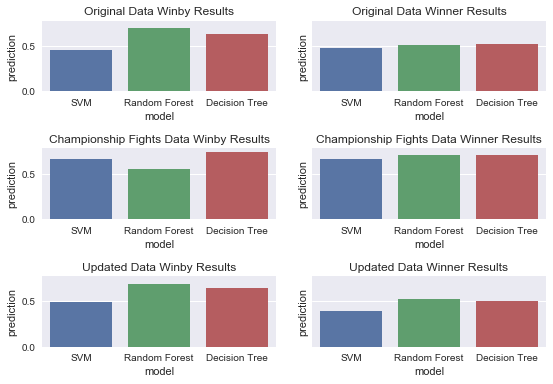

In [704]:
winby_results_dt = dict()
winner_results_dt = dict()

winby_results_rf = dict()
winner_results_rf = dict()

winby_results_svm = dict()
winner_results_svm = dict()

original_data_results_winby = dict()
original_data_results_winner = dict()
championship_fights_Results_winby = dict()
championship_fights_Results_winner = dict()
updated_data_results_winby = dict()
updated_data_results_winner = dict()

##using the methods above to retrieve the data

original_data_results_winby['Decision Tree'] = decision_tree_winby(original_data)
original_data_results_winby['Random Forest'] = random_forrest_winby(original_data)
original_data_results_winby['SVM'] = svm_winby(original_data)

original_data_results_winner['Decision Tree'] = decision_tree_winner(original_data)
original_data_results_winner['Random Forest'] = random_forrest_winner(original_data)
original_data_results_winner['SVM'] = svm_winner(original_data)

championship_fights_Results_winby['Decision Tree'] = decision_tree_winby(championship_fights)
championship_fights_Results_winby['Random Forest'] = random_forrest_winby(championship_fights)
championship_fights_Results_winby['SVM'] = svm_winby(championship_fights)

championship_fights_Results_winner['Decision Tree'] = decision_tree_winner(championship_fights)
championship_fights_Results_winner['Random Forest'] = random_forrest_winner(championship_fights)
championship_fights_Results_winner['SVM'] = svm_winner(championship_fights)

updated_data_results_winby['Decision Tree'] = decision_tree_winby(data)
updated_data_results_winby['Random Forest'] = random_forrest_winby(data)
updated_data_results_winby['SVM'] = svm_winby(data)

updated_data_results_winner['Decision Tree'] = decision_tree_winner(data)
updated_data_results_winner['Random Forest'] = random_forrest_winner(data)
updated_data_results_winner['SVM'] = svm_winner(data)

##creating the dataframes

original_data_results_winby_df = pd.DataFrame.from_dict(data=original_data_results_winby, orient='index')
original_data_results_winby_df['model'] = original_data_results_winby_df.index
original_data_results_winby_df['prediction'] = original_data_results_winby_df[original_data_results_winby_df.columns.values[0]]

original_data_results_winner_df = pd.DataFrame.from_dict(data=original_data_results_winner, orient='index')
original_data_results_winner_df['model'] = original_data_results_winner_df.index
original_data_results_winner_df['prediction'] = original_data_results_winner_df[original_data_results_winner_df.columns.values[0]]

championship_fights_Results_winby_df = pd.DataFrame.from_dict(data=championship_fights_Results_winby, orient='index')
championship_fights_Results_winby_df['model'] = championship_fights_Results_winby_df.index
championship_fights_Results_winby_df['prediction'] = championship_fights_Results_winby_df[championship_fights_Results_winby_df.columns.values[0]]

championship_fights_Results_winner_df = pd.DataFrame.from_dict(data=championship_fights_Results_winner, orient='index')
championship_fights_Results_winner_df['model'] = championship_fights_Results_winner_df.index
championship_fights_Results_winner_df['prediction'] = championship_fights_Results_winner_df[championship_fights_Results_winner_df.columns.values[0]]

updated_data_results_winby_df = pd.DataFrame.from_dict(data=updated_data_results_winby, orient='index')
updated_data_results_winby_df['model'] = updated_data_results_winby_df.index
updated_data_results_winby_df['prediction'] = updated_data_results_winby_df[updated_data_results_winby_df.columns.values[0]]

updated_data_results_winner_df = pd.DataFrame.from_dict(data=updated_data_results_winner, orient='index')
updated_data_results_winner_df['model'] = updated_data_results_winner_df.index
updated_data_results_winner_df['prediction'] = updated_data_results_winner_df[updated_data_results_winner_df.columns.values[0]]

##creating the bar plots to show a comparison of the results

f, ((ax1,ax2),(ax3,ax4),(ax5,ax6) ) = plt.subplots(3,2, sharey=True)

sns.barplot(data = original_data_results_winby_df,x=original_data_results_winby_df['model'], y = original_data_results_winby_df['prediction'], ax = ax1)
ax1.set_title('Original Data Winby Results')
ax1.set_ylabel('prediction')
sns.barplot(data = original_data_results_winner_df,x=original_data_results_winner_df['model'], y = original_data_results_winner_df['prediction'], ax = ax2)
ax2.set_title('Original Data Winner Results')
ax2.set_ylabel('prediction')

sns.barplot(data = championship_fights_Results_winby_df,x=championship_fights_Results_winby_df['model'], y = championship_fights_Results_winby_df['prediction'], ax = ax3)
ax3.set_title('Championship Fights Data Winby Results')
ax3.set_ylabel('prediction')

sns.barplot(data = championship_fights_Results_winner_df,x=championship_fights_Results_winner_df['model'], y = championship_fights_Results_winner_df['prediction'], ax = ax4)
ax4.set_title('Championship Fights Data Winner Results')
ax4.set_ylabel('prediction')

sns.barplot(data = updated_data_results_winby_df,x=updated_data_results_winby_df['model'], y = updated_data_results_winby_df['prediction'], ax = ax5)
ax5.set_title('Updated Data Winby Results')
ax5.set_ylabel('prediction')

sns.barplot(data = updated_data_results_winner_df,x=updated_data_results_winner_df['model'], y = updated_data_results_winner_df['prediction'], ax = ax6)
ax6.set_title('Updated Data Winner Results')
ax6.set_ylabel('prediction')

plt.tight_layout()
plt.show()

Conclusion: 

As you can see the random forrest model did the best in each test except for the championship fights winby category. The best predictions were in the championship fights winner predictions while the lowest results were in the updated data winner results. In general the predictions for the championship fights were higher than the rest. This is probably due to more data, but it's an interesting result. These results are not nearly good enough to be used for a practical purpose, like for analysis by a UFC judge during or after a bout, but they are promising enough to look into more training better models in the future.